<a href="https://colab.research.google.com/github/klauss1977/ML/blob/main/Moore_Penrose_Pseudoinverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pseudoinversa Moore-Penrose

$MPP$ a unei matrici $A$, notata cu $A^+$, se calculeaza cu formula:             
 **$A^+$=$V$$D^+$$U^T$** in care:                                                
  $U$, $D$ si $V$ sunt $SVD$ ale matricii $A$, cu $D^+$ obtinut prin inversarea valorilor nenule ale lui $D$

$MPP$ se foloseste pentru calcularea pseudoinversei a matricilor care nu indeplinesc conditiile pentru a putea fi inversate.

Aceste conditii sunt:

-matricea trebuie sa fie patrata (numar linii = numar coloane)

-matricea este nesingulara (nu are linii sau coloane dependente una de cealalta)

Exemplu de calcul:

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
A=np.array([[-1,2],[3,-2],[5,7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

Se foloseste SVD pentru a afla $U$, $d$ si $V^T$

In [38]:
U, d, VT = np.linalg.svd(A)

In [39]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [40]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [41]:
d

array([8.66918448, 4.10429538])

Se creaza matricea $D$ folosind singular values $d$:

In [42]:
D=np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

Se calculeaza $D^+$ prin inversarea matricii D:

In [43]:
Dinv=np.linalg.inv(D)
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

$D^+$ trebuie sa aiba aceleasi dimensiuni ca si $A^T$. De aceea se adauga o coloana de 0 la Dinv:

In [44]:
Dplus = np.concatenate((Dinv, np.array([[0, 0]]).T), axis=1)
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

Acum se poate calcula $MPP$ $A^+$ folosind formula:

$A^+$ = $V$$D^+$$U^T$:

In [45]:
np.dot(VT.T, np.dot(Dplus, U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

Numpy are o metoda directa pentru calculul $MPP$ $A^+$:

In [46]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

##Exercitiu - Aplicare Moore-Penrose Pseudoinverse - $MPP$

$MPP$ este foarte util in practica Machine Learning unde se folosesc matrici care nu sunt patrate.

Frecvent, in practica sunt situatii de tip *overdetermined*, cand numarul de linii al matricii este mai mare decat numarul de coloane (adica numarul de intrari in dataset este mai mare decat numarul de features)

Sa consideram un exemplu minimal in care avem un numar de 8 datapoints (8 randuri in matrice)

In [47]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7] # De exemplu doza de medicament in mililitri pentru tratamentul Alzheimer
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # Cuantificarea predispozitiei pacientului la uitare dupa administrare doza tratament

In [48]:
title = 'Teste clinice'
xlabel = 'Doza medicament in mL'
ylabel = 'Grad uitare'

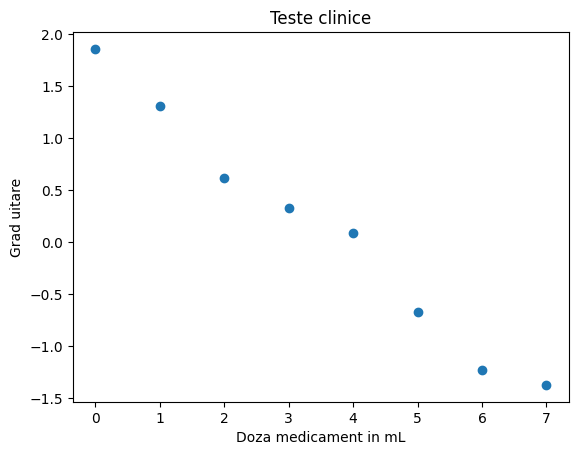

In [52]:
fig, ax=plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_=ax.scatter(x1,y)